<a href="https://colab.research.google.com/github/olalepek/Text-Mining---Agriculture/blob/main/Agriculture_Tweet_Text_Mining_and_Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW TO CULTIVATE YOUR FIELD

This project aims to analyze the impact of minimum tillage practices on Soil Organic Carbon (SOC) by reviewing abstracts of scientific publications
>

> Indented block





# Setup

In [1]:
!pip install rispy pandas

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rispy
!python -m spacy download en_core_web_sm




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Preprocessing




In [ ]:
# Load the RIS file
ris_file_path ='/content/drive/MyDrive/Studia DSE/combined_file.ris'

with open(ris_file_path, 'r') as bibliography_file:
    entries = rispy.load(bibliography_file)


df = pd.DataFrame(entries)

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(articles)

In [ ]:
df.iloc[1]

In [ ]:
selected = ['title','alternate_title1','year','authors','abstract','keywords','secondary_title','notes','type_of_work']
dataset = df[selected]

In [ ]:
dataset.head()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17875 entries, 0 to 17874
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             17875 non-null  object
 1   alternate_title1  17715 non-null  object
 2   year              17875 non-null  object
 3   authors           17869 non-null  object
 4   abstract          17842 non-null  object
 5   keywords          17197 non-null  object
 6   secondary_title   17481 non-null  object
 7   notes             17875 non-null  object
 8   type_of_work      17874 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


In [ ]:
dataset = dataset.dropna(axis=0, how="any")

In [ ]:
dataset = dataset.astype(str)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1991
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TI      1893 non-null   object
 1   T2      1893 non-null   object
 2   PY      1893 non-null   object
 3   AU      1893 non-null   object
 4   AB      1893 non-null   object
 5   KW      1893 non-null   object
 6   N1      1893 non-null   object
 7   M3      1893 non-null   object
 8   LA      1893 non-null   object
 9   UR      1893 non-null   object
dtypes: object(10)
memory usage: 162.7+ KB


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

processed=[]


for abstract in dataset['abstract']:

    abstract = re.sub('[^a-zA-Z]', ' ', abstract) #replacing any punctuation or anything that is not ^ a-z and A-Zletter with the space

    abstract = abstract.lower() #lowercase all the words
    abstract = abstract.split()# splitting the abstract into words

      # Stemming the words to keep only the roots using Porter Stemmer
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    abstract = [ps.stem(word) for word in abstract if not word in set(all_stopwords)]
    abstract = ' '.join(abstract)
    processed.append(abstract)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset['processed'] = processed

In [ ]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"[Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...",Effects of soil pH on weak acid and weak base ...,"[atrazine, dicamba, atrazine, dicamba, adsorpt...","Journal of Environmental Science and Health, P...","[Cited By :19, Export Date: 30 April 2020]",Article,effect soil ph weak acid weak base herbicid ad...
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"[Singh, G., Abrol, I.P., Cheema, S.S.]",Growth responses of mesquite (Prosopis juliflo...,"[Agroforestry, alkali soil, amendments, biomas...",Agroforestry Systems,"[Cited By :18, Export Date: 30 April 2020, COD...",Article,growth respons mesquit prosopi juliflora sw dc...
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"[Maskina, M.S., Bijay-Singh, Yadvinder-Singh, ...",Field experiments with rice-wheat rotation wer...,"[farmyard manure, maize, nitrogen, phosphorus,...",Fertilizer Research,"[Cited By :24, Export Date: 30 April 2020, COD...",Article,field experi rice wheat rotat conduct five con...
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"[Singh, A.L., Singh, P.K., Lata, P.]",Application of higher levels (60 and 90 kg N h...,"[Azolla pinnata (Bangkok), blue-green algae (B...",Fertilizer Research,"[Cited By :4, Export Date: 30 April 2020, CODE...",Article,applic higher level kg n ha nitrogen fertil ur...
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"[Gelderman, R.H., Dahnke, W.C., Swenson, L.]",A study relating N uptake by wheat to several ...,"[mineralizable nitrogen, mineralization, nitro...",Communications in Soil Science and Plant Analysis,"[Cited By :11, Export Date: 30 April 2020]",Article,studi relat n uptak wheat sever n soil test co...


## Lemmatized text

In [ ]:
!pip install spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
dataset['lemmatized_text'] = dataset['abstract'].apply(lemmatize_text)


In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

processed2=[]


for abstract in dataset['lemmatized_text']:
  abstract = re.sub('[^a-zA-Z]', ' ', abstract) #replacing any punctuation or anything that is not ^ a-z and A-Zletter with the space
  abstract = abstract.lower() #lowercase all the words
  all_stopwords = stopwords.words('english')
  words = word_tokenize(abstract)
  filtered_abstract = " ".join(word for word in words if word not in all_stopwords)
  processed2.append(filtered_abstract)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset['processed_lemmatized'] = processed2

### Comparing Lemmatized abstract with Porter Stemmer


In [ ]:
selected = ['abstract','processed','lemmatized_text','processed_lemmatized' ]
dataset_view = dataset[selected]

dataset_view.head(truncate = false)

,abstract,processed,lemmatized_text,processed_lemmatized
1,Effects of soil pH on weak acid and weak base ...,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...
2,Growth responses of mesquite (Prosopis juliflo...,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...
3,Field experiments with rice-wheat rotation wer...,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...
4,Application of higher levels (60 and 90 kg N h...,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...
5,A study relating N uptake by wheat to several ...,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_stemmed_lemmatized.csv', index=False)


## Creating Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(processed).toarray()
y = dataset.iloc[:, -1].values

AttributeError: ignored

#Models


## Topic Modelling from abstracts

In [ ]:
from gensim import corpora
from gensim.models import LdaModel

In [ ]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [ ]:
dataset['abstract_tokens_lemmatized'] = dataset['processed_lemmatized'].apply(tokenize_text)

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_stemmed_lemmatized_tokens.csv', index=False)

In [ ]:
dictionary = corpora.Dictionary(dataset['abstract_tokens_lemmatized'])

In [ ]:
corpus = [dictionary.doc2bow(text) for text in dataset['abstract_tokens_lemmatized']]

lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15)


In [ ]:
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.035*"root" + 0.026*"plant" + 0.026*"specie" + 0.025*"model" + 0.018*"earthworm" + 0.012*"use"')
(1, '0.081*"soil" + 0.055*"biochar" + 0.026*"increase" + 0.020*"amendment" + 0.016*"application" + 0.015*"effect"')
(2, '0.068*"soil" + 0.034*"microbial" + 0.028*"activity" + 0.020*"community" + 0.017*"organic" + 0.012*"biomass"')
(3, '0.082*"soil" + 0.018*"water" + 0.011*"property" + 0.011*"content" + 0.009*"site" + 0.009*"high"')
(4, '0.060*"compost" + 0.034*"plant" + 0.026*"organic" + 0.018*"growth" + 0.017*"treatment" + 0.017*"waste"')
(5, '0.042*"organic" + 0.036*"som" + 0.030*"c" + 0.021*"fraction" + 0.020*"matter" + 0.019*"acid"')
(6, '0.081*"n" + 0.056*"c" + 0.049*"soil" + 0.015*"residue" + 0.014*"organic" + 0.012*"rate"')
(7, '0.052*"soil" + 0.018*"organic" + 0.016*"metal" + 0.013*"concentration" + 0.011*"cd" + 0.010*"sorption"')
(8, '0.026*"soil" + 0.020*"crop" + 0.019*"use" + 0.014*"system" + 0.013*"management" + 0.011*"organic"')
(9, '0.102*"emission" + 0.076*"co" + 0.033*

## Selecting only abstracts classified as topic connected to tillage

In [ ]:
#Topic distribution for each of the abstracts
topic_distributions = lda_model[corpus]

In [ ]:
# Get the dominant topic for each document
dominant_topics = [sorted(doc, key=lambda x: x[1], reverse=True)[0][0] for doc in topic_distributions]

In [ ]:
# Add the dominant topic as a column to your dataset
dataset['dominant_topic'] = dominant_topics

In [ ]:
dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"[Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...",Effects of soil pH on weak acid and weak base ...,"[soil, ph, adsorption, compare, solution]","Journal of Environmental Science and Health, P...","[Cited By :19, Export Date: 30 April 2020]",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"[effect, soil, ph, weak, acid, weak, base, her...",7
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"[Singh, G., Abrol, I.P., Cheema, S.S.]",Growth responses of mesquite (Prosopis juliflo...,"[plant, grass, soil, mesquite, gypsum]",Agroforestry Systems,"[Cited By :18, Export Date: 30 April 2020, COD...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"[growth, response, mesquite, prosopis, juliflo...",4
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"[Maskina, M.S., Bijay-Singh, Yadvinder-Singh, ...",Field experiments with rice-wheat rotation wer...,"[soil, rice, ha, kg, yield]",Fertilizer Research,"[Cited By :24, Export Date: 30 April 2020, COD...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"[field, experiment, rice, wheat, rotation, con...",12
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"[Singh, A.L., Singh, P.K., Lata, P.]",Application of higher levels (60 and 90 kg N h...,"[bga, rice, azolla, kg, ha]",Fertilizer Research,"[Cited By :4, Export Date: 30 April 2020, CODE...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"[application, high, level, kg, n, ha, nitrogen...",12
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"[Gelderman, R.H., Dahnke, W.C., Swenson, L.]",A study relating N uptake by wheat to several ...,"[n, r, soil, year, use]",Communications in Soil Science and Plant Analysis,"[Cited By :11, Export Date: 30 April 2020]",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"[study, relate, n, uptake, wheat, several, n, ...",6


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_lemmatized_topic_classified.csv', index=False)

In [ ]:
# Filter the dataset for topic about tillage [10]
tillage_abstracts = dataset[dataset['dominant_topic'] == 10]

In [ ]:
tillage_abstracts.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic
6,"Carbon, nitrogen, and gaseous profiles in a hu...",Commun. Soil Sci. Plant Anal.,1988,"[Staley, T.E.]",The effect of four consecutive years of tillag...,"[n, soil, tillage, ct, rate]",Communications in Soil Science and Plant Analysis,"[Cited By :8, Export Date: 30 April 2020, Corr...",Article,effect four consecut year tillag method conven...,the effect of four consecutive year of tillage...,effect four consecutive year tillage method co...,"[effect, four, consecutive, year, tillage, met...",10
9,SURFACE SOIL NUTRIENT DISTRIBUTION AS AFFECTED...,Soil Sci Soc Am J,1988,"[Follett, R.F., Peterson, G.A.]",Research was conducted to determine long-term ...,"[site, tillage, soil, plow, native]",Soil Science Society of America Journal,"[Cited By :81, Export Date: 30 April 2020, COD...",Article,research conduct determin long term effect til...,Research be conduct to determine long - term e...,research conduct determine long term effect ti...,"[research, conduct, determine, long, term, eff...",10
42,Effect of no-tillage vs. conventional tillage ...,Commun. Soil Sci. Plant Anal.,1987,"[Gallaher, R.N., Ferrer, M.B.]","Four treatments (no-tillage plus subsoiling, n...","[tillage, soil, treatment, depth, cm]",Communications in Soil Science and Plant Analysis,"[Cited By :17, Export Date: 30 April 2020]",Article,four treatment tillag plu subsoil tillag conve...,four treatment ( no - tillage plus subsoiling ...,four treatment tillage plus subsoiling tillage...,"[four, treatment, tillage, plus, subsoiling, t...",10
50,The effect of reduced tillage on soil organic ...,S. Afr. J. Plant Soil,1987,"[van der Watt, H.V.H.]",The organic carbon contents of the 0–15-cm and...,"[sample, organic, tillage, stubble, till]",South African Journal of Plant and Soil,"[Cited By :7, Export Date: 30 April 2020, Corr...",Article,organ carbon content cm cm layer convent till ...,the organic carbon content of the 0–15 - cm an...,organic carbon content cm cm layer conventiona...,"[organic, carbon, content, cm, cm, layer, conv...",10
56,Effect of tillage on organic matter properties...,Sci. Total Environ.,1987,"[Andriulo, A.E., Rosell, R.A., Crespo, M.B.]",The effect of two tillage systems in the wheat...,"[om, tillage, soil, e, two]","Science of the Total Environment, The","[Cited By :8, Export Date: 30 April 2020, CODE...",Article,effect two tillag system wheat soybean annual ...,the effect of two tillage system in the wheat ...,effect two tillage system wheat soybean annual...,"[effect, two, tillage, system, wheat, soybean,...",10


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_tillage.csv', index=False)

## TF-IDF Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer instance
vectorizer = TfidfVectorizer(max_features=5000)  # You can limit the number of features
tfidf_matrix = vectorizer.fit_transform(dataset['processed_lemmatized'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

In [ ]:
def get_top_tfidf_features(row, features, top_n=10):
    """Return top n tfidf values in row and their corresponding feature names."""
    topn_ids = row.argsort()[-top_n:][::-1]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    return top_feats

# Get the top features for the first abstract, for example
first_abstract_vector = tfidf_matrix[0].toarray()[0]
top_features_for_first_abstract = get_top_tfidf_features(first_abstract_vector, feature_names)
print(top_features_for_first_abstract)

[('adsorption', 0.4718234706633043), ('ph', 0.38767242770436766), ('solution', 0.2812533843001408), ('soil', 0.25270643399436615), ('atrazine', 0.22135484519284543), ('ionic', 0.21991990161497918), ('naoh', 0.21392052694709845), ('strength', 0.1828250912147036), ('herbicide', 0.16184052551794845), ('kd', 0.1439629727183271)]


## Creating Apriori Model to count the words and creatint the word cloud

In [ ]:
!pip install efficient_apriori

In [ ]:
apriori =  dataset['processed_lemmatized']
transactions = apriori.str.split()
transactions = [tuple(row) for row in transactions.values.tolist()]
from efficient_apriori import apriori
itemsets, rules = apriori(transactions, min_support=0.25, min_confidence=1)
print(itemsets)

In [ ]:
print(itemsets)

{1: {('effect',): 9270, ('soil',): 16549, ('change',): 4950, ('system',): 5418, ('may',): 4498, ('field',): 5436, ('different',): 5898, ('compare',): 6399, ('increase',): 11272, ('organic',): 15109, ('carbon',): 9262, ('decrease',): 5041, ('treatment',): 6774, ('reduce',): 4540, ('study',): 9998, ('p',): 4574, ('experiment',): 5769, ('plant',): 5032, ('total',): 5962, ('year',): 6336, ('significantly',): 5542, ('however',): 5174, ('use',): 9474, ('manure',): 4479, ('control',): 4692, ('two',): 5130, ('ha',): 4564, ('yield',): 4525, ('crop',): 7144, ('improve',): 4299, ('n',): 6852, ('content',): 7299, ('water',): 4597, ('rate',): 5169, ('low',): 6278, ('matter',): 9179, ('fertilizer',): 4578, ('application',): 6064, ('high',): 9668, ('nitrogen',): 4508, ('show',): 6389, ('significant',): 4367, ('result',): 9093, ('long',): 4392, ('term',): 4966, ('c',): 7145, ('three',): 4173, ('property',): 4342, ('management',): 5142, ('also',): 5058, ('indicate',): 4195}, 2: {('also', 'organic'): 46

In [ ]:
print(rules)


[]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
frequency_dict = {}

for k, v in itemsets.items():
    for items, frequency in v.items():
        # Join multi-word itemsets by a space or any other connector of your choice
        key = ' '.join(items)
        frequency_dict[key] = frequency

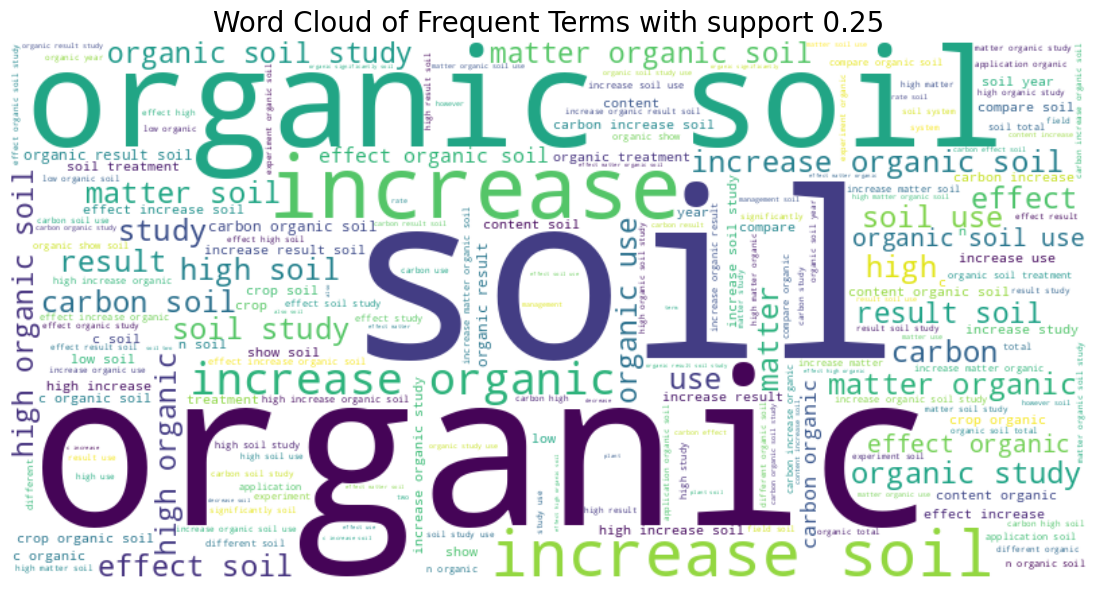

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms with support 0.25', fontsize=20, color='black')
plt.show()






In [ ]:
itemsets2, rules2 = apriori(transactions, min_support=0.5, min_confidence=1)
print(itemsets2)

{1: {('effect',): 9270, ('soil',): 16549, ('increase',): 11272, ('organic',): 15109, ('carbon',): 9262, ('study',): 9998, ('use',): 9474, ('matter',): 9179, ('high',): 9668, ('result',): 9093}, 2: {('carbon', 'soil'): 9206, ('effect', 'organic'): 8425, ('effect', 'soil'): 9222, ('high', 'organic'): 8812, ('high', 'soil'): 9596, ('increase', 'organic'): 10246, ('increase', 'soil'): 11209, ('matter', 'organic'): 9127, ('matter', 'soil'): 9138, ('organic', 'soil'): 15037, ('organic', 'study'): 9118, ('organic', 'use'): 8534, ('result', 'soil'): 9029, ('soil', 'study'): 9927, ('soil', 'use'): 9395}, 3: {('effect', 'organic', 'soil'): 8397, ('high', 'organic', 'soil'): 8776, ('increase', 'organic', 'soil'): 10211, ('matter', 'organic', 'soil'): 9090, ('organic', 'soil', 'study'): 9075, ('organic', 'soil', 'use'): 8490}}


In [ ]:
frequency_dict2 = {}

for k, v in itemsets2.items():
    for items, frequency in v.items():
        # Join multi-word itemsets by a space or any other connector of your choice
        key = ' '.join(items)
        frequency_dict2[key] = frequency

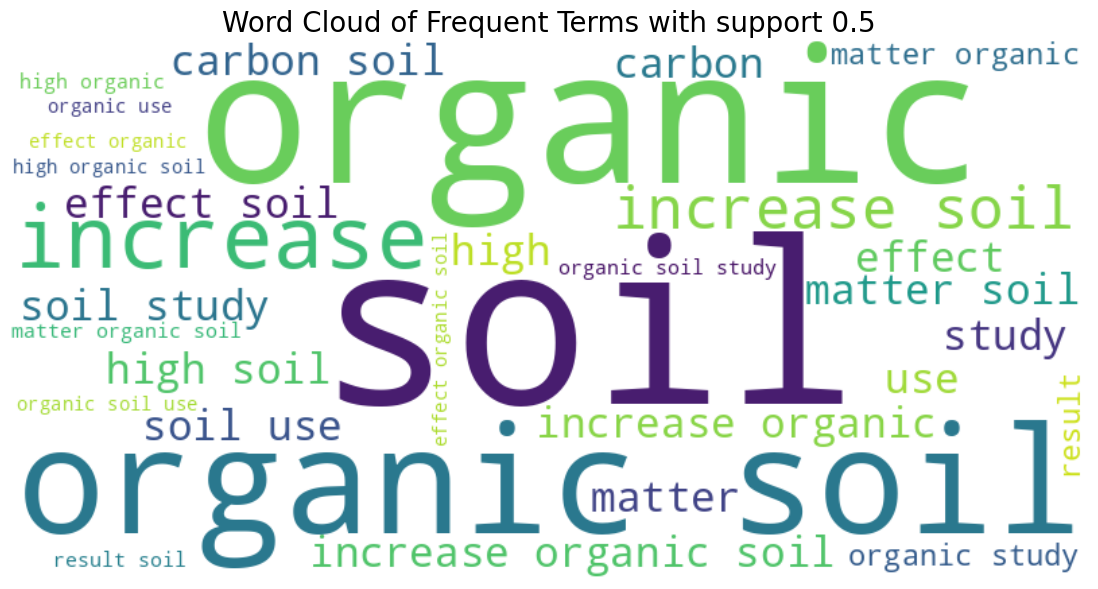

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict2)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms with support 0.5', fontsize=20, color='black')
plt.show()

## TextRank


In [ ]:
import networkx as nx
from collections import defaultdict

def textrank(text, window_size=2):
    # Tokenize
    words = text.split()

    # Build a graph
    graph = defaultdict(set)
    for i in range(len(words) - window_size):
        for j in range(i+1, i + window_size):
            graph[words[i]].add(words[j])
            graph[words[j]].add(words[i])

    nx_graph = nx.from_dict_of_lists(graph)
    scores = nx.pagerank(nx_graph)

    # Return top words based on their scores
    sorted_scores = sorted(scores, key=scores.get, reverse=True)

    # Here, we're just returning the top 5 keywords for simplicity
    return sorted_scores[:5]


In [ ]:
dataset['keywords'] = dataset['processed_lemmatized'].apply(textrank)

dataset.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized
1,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"[Clay, S.A., Koskinen, W.C., Allmaras, R.R., D...",Effects of soil pH on weak acid and weak base ...,"[soil, ph, adsorption, compare, solution]","Journal of Environmental Science and Health, P...","[Cited By :19, Export Date: 30 April 2020]",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"[effect, soil, ph, weak, acid, weak, base, her..."
2,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"[Singh, G., Abrol, I.P., Cheema, S.S.]",Growth responses of mesquite (Prosopis juliflo...,"[plant, grass, soil, mesquite, gypsum]",Agroforestry Systems,"[Cited By :18, Export Date: 30 April 2020, COD...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"[growth, response, mesquite, prosopis, juliflo..."
3,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"[Maskina, M.S., Bijay-Singh, Yadvinder-Singh, ...",Field experiments with rice-wheat rotation wer...,"[soil, rice, ha, kg, yield]",Fertilizer Research,"[Cited By :24, Export Date: 30 April 2020, COD...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"[field, experiment, rice, wheat, rotation, con..."
4,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"[Singh, A.L., Singh, P.K., Lata, P.]",Application of higher levels (60 and 90 kg N h...,"[bga, rice, azolla, kg, ha]",Fertilizer Research,"[Cited By :4, Export Date: 30 April 2020, CODE...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"[application, high, level, kg, n, ha, nitrogen..."
5,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"[Gelderman, R.H., Dahnke, W.C., Swenson, L.]",A study relating N uptake by wheat to several ...,"[n, r, soil, year, use]",Communications in Soil Science and Plant Analysis,"[Cited By :11, Export Date: 30 April 2020]",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"[study, relate, n, uptake, wheat, several, n, ..."


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstracts_textRank.csv', index=False)

## BERT

###Setting up Pyspark


In [ ]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=1ee3ae5915c921d3909c00cd3a0b24b3466c94daf655c638b9fa7851b9c7c14d
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz


In [ ]:
!tar -xf '/content/spark-3.3.3-bin-hadoop3.tgz'

In [ ]:
# Set up the enviornment
import os
os.environ["JAVA_HOME"] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ["SPARK_HOME"] = '/content/spark-3.3.3-bin-hadoop3'


In [ ]:
findspark.init()

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
spark = SparkSession.builder.appName('First Session').getOrCreate()

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00


### Setting up BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

def get_bert_embedding(text):
    # Ensure the function uses global BERT model and tokenizer
    global model, tokenizer

    # Tokenize text and convert to tensor
    inputs = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=512)

    # Compute embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert tensor to list and return
    return outputs.last_hidden_state[:, 0, :].numpy().tolist()

# Convert the function to a Spark UDF (User Defined Function)
bert_udf = udf(get_bert_embedding, ArrayType(FloatType()))


In [ ]:


# Creating spark dataframe
df = spark.createDataFrame(dataset,['processed'])



/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
# Apply BERT UDF to the DataFrame
df_with_embeddings = df.withColumn("bert_embedding", bert_udf(df['processed']))
df_with_embeddings.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------+----+--------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df.show()

+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+------------+-------+--------------------+--------------------+
|           processed|                  _2|  _3|                  _4|                  _5|                  _6|                  _7|          _8|     _9|                 _10|                 _11|
+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------------------+------------+-------+--------------------+--------------------+
|Long-term impact ...|Science of the To...|2017|['Yadav, R.K.', '...|Soil organic matt...|['Al and Si', 'Am...|['Cited By :7', '...|     Article|English|https://www.scopu...|soil organ matter...|
|Coupling life-cyc...|Science of the To...|2017|['Yao, Z.', 'Zhan...|Reducing the carb...|['Carbon sequestr...|['Cited By :12', ...|     Article|English|https://www.scopu...|reduc carbon foot...|
|Cropping systems ..

In [ ]:
df.write.csv("/content/drive/MyDrive/Studia DSE/Agro Text Mining/processedBERT_2017_2009.csv", header=True)

### BERT without Pyspark

In [ ]:
!pip install transformers torch pandas

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = "distilbert-base-uncased" #for longer abstracts and bigger volume
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of BertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['encoder.layer.3.attention.self.query.bias', 'encoder.layer.11.attention.output.LayerNorm.bias', 'encoder.layer.8.output.LayerNorm.weight', 'encoder.layer.9.attention.output.LayerNorm.bias', 'encoder.layer.6.output.dense.weight', 'encoder.layer.4.output.dense.weight', 'encoder.layer.5.attention.self.query.bias', 'encoder.layer.1.output.LayerNorm.weight', 'encoder.layer.7.output.dense.bias', 'encoder.layer.6.attention.output.dense.weight', 'encoder.layer.9.attention.self.query.bias', 'encoder.layer.8.attention.output.LayerNorm.weight', 'encoder.layer.2.intermediate.dense.weight', 'encoder.layer.3.attention.self.key.weight', 'encoder.layer.2.attention.self.value.weight', 'encoder.layer.2.attention.self.query.weight', 'encoder.layer.9.attention.self.value.weight', 'encoder.layer.11.attention.self.value.bias', 'encoder.layer.2.attention.self.key.weight', 'encoder.

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
def get_bert_embedding(abstract):
    # Tokenize abstract and return tensor
    inputs = tokenizer(abstract, return_tensors="pt", padding="max_length", truncation=True, max_length=512)

    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    # Return the embeddings of the [CLS] token, typically used for classification tasks
    return outputs.last_hidden_state[:, 0, :].numpy()

# Apply the function to the 'abstract' column to get embeddings
df['bert_embedding'] = df[0].apply(get_bert_embedding)



###  t-SNE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
df = df_with_embeddings.select('processed','_5')

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df = df.select("*").withColumn("id", monotonically_increasing_id())

In [ ]:
df = df.where(df.id < 100)
df.printSchema()

root
 |-- processed: string (nullable = true)
 |-- _5: string (nullable = true)
 |-- id: long (nullable = false)



In [ ]:
#Converting pyspark DF to pandas to support t-sne
dfPandas = df.toPandas()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:


embeddings = np.array(df['bert_embedding'].tolist())

# Apply t-SNE
tsne_embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(tsne_embeddings[:, 0], tsne_embeddings[:, 1], alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.3.3-bin-hadoop3/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

# Rule Based Matching


### First Try


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Studia DSE/abstracts_lemmatized_topic_classified.csv')


In [5]:
rules_df = pd.read_excel('/content/drive/MyDrive/Studia DSE/Agro Text Mining/ontologia-02022022-3.xlsx')


In [6]:
rules_df.info()
rules_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Annotation (sono tutte cause del SOC)  587 non-null    object        
 1   Livello intermedio                     587 non-null    object        
 2   Subtext                                587 non-null    object        
 3   Note                                   20 non-null     object        
 4   Data aggiunta / modifica               215 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 23.1+ KB


,Annotation (sono tutte cause del SOC),Livello intermedio,Subtext,Note,Data aggiunta / modifica
0,BARE SOIL,BARE SOIL,bare soil,NaN,NaT
1,BARE SOIL,BARE SOIL,fallow,NaN,NaT
2,BARE SOIL,BARE SOIL,no cover crop,NaN,2022-01-04
3,BARE SOIL,BARE SOIL,uncultivated,NaN,NaT
4,BARE SOIL,BARE SOIL,without cover crop,NaN,2022-01-04


In [3]:
import spacy
import pandas as pd
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler
nlp = spacy.load("en_core_web_sm")



In [ ]:
pip show spacy

In [ ]:
rules_df.columns=["Category", "Subcategory", "Pattern","1","2"]

rules_df.head()


In [ ]:
patterns = [{"label": row["Category"], "pattern": row["Pattern"]} for index, row in rules_df.iterrows()]


print(patterns)

In [ ]:
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)

In [ ]:
nlp.analyze_pipes()

In [ ]:
ruler_patterns = ruler.patterns

# Display the first 5 patterns
for pattern in ruler_patterns[:5]:
    print(pattern)

In [ ]:
dataset["ents"] = dataset["lemmatized_text"].apply(lambda abstract: [(ent.text, ent.label_) for ent in nlp(abstract).ents])

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules.csv', index=False)

In [ ]:
dataset.head(5)

In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules.csv')

In [ ]:
import re

increase_pattern = r"\b(?:increase|raise|enhance|boost)\b"
decrease_pattern = r"\b(?:decrease|drop|reduce|lower|diminish)\b"

# Function to find matches based on the given pattern
def find_matches(text, pattern):
    matches = re.findall(pattern, text)
    return "; ".join(matches) if matches else None

# Apply the increase and decrease patterns to the 'abstracts' column
dataset['Increase_RegEx'] = dataset['lemmatized_text'].apply(lambda x: find_matches(x, increase_pattern))
dataset['Decrease_RegEx'] = dataset['lemmatized_text'].apply(lambda x: find_matches(x, decrease_pattern))

# Show the resulting DataFrame
dataset.head()

Adding Increase/decrease patterns as entities to the pattern

In [ ]:
pattern_change = [
    {"label": "INCREASE", "pattern": [{"TEXT": {"REGEX": "increase|raise|enhance|boost"}}]},
    {"label": "DECREASE", "pattern": [{"TEXT": {"REGEX": "decrease|drop|reduce|lower|diminish"}}]},
    {"label": "NEUTRAL", "pattern": [{"TEXT": {"REGEX": "no effect|unchange|remain the same|no significant (change|difference|impact)"}}]}
]
ruler.add_patterns(pattern_change)

In [ ]:
dataset["ents"] = dataset["lemmatized_text"].apply(lambda abstract: [(ent.text, ent.label_) for ent in nlp(abstract).ents])

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules.csv', index=False)

In [ ]:
dataset.head()

### Checking the distance between different ents and ents difined for increase and decrease

In [ ]:
# Function to calculate distances
def calculate_entity_distances(text, max_distance=1):
    doc = nlp(text)
    target_entities = [ent for ent in doc.ents if ent.label_ in ["INCREASE", "DECREASE"]]
    other_entities = [ent for ent in doc.ents if ent.label_ not in ["INCREASE", "DECREASE"]]

    summaries = []
    for target_ent in target_entities:
        for other_ent in other_entities:
            distance = abs(target_ent.start - other_ent.start)
            if distance <= max_distance:
                summaries.append(f"{target_ent.label_} near {other_ent.text}")
    return "; ".join(summaries) if summaries else "No close entities"

# Apply the function to the 'abstracts' column and store results in a new column
dataset['Entity_Distances'] = dataset['lemmatized_text'].apply(calculate_entity_distances)


In [18]:
dataset.head(6)

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Entity_Distances
0,Differences in Herbicide Adsorption on Soil Us...,J. Environ. Sci. Health Part B Pestic. Food Co...,1988,"['Clay, S.A.', 'Koskinen, W.C.', 'Allmaras, R....",Effects of soil pH on weak acid and weak base ...,"['soil', 'ph', 'adsorption', 'compare', 'solut...","Journal of Environmental Science and Health, P...","['Cited By :19', 'Export Date: 30 April 2020']",Article,effect soil ph weak acid weak base herbicid ad...,effect of soil ph on weak acid and weak base h...,effect soil ph weak acid weak base herbicide a...,"['effect', 'soil', 'ph', 'weak', 'acid', 'weak...",7,"[('amendment', 'ORGANIC FERTILISATION'), ('HC1...",No close entities
1,Agroforestry on alkali soil: effect of plantin...,Agroforest Syst,1988,"['Singh, G.', 'Abrol, I.P.', 'Cheema, S.S.']",Growth responses of mesquite (Prosopis juliflo...,"['plant', 'grass', 'soil', 'mesquite', 'gypsum']",Agroforestry Systems,"['Cited By :18', 'Export Date: 30 April 2020',...",Article,growth respons mesquit prosopi juliflora sw dc...,growth response of mesquite ( Prosopis juliflo...,growth response mesquite prosopis juliflora sw...,"['growth', 'response', 'mesquite', 'prosopis',...",4,"[('SW', 'GPE'), ('amendment', 'ORGANIC FERTILI...",No close entities
2,Fertilizer requirement of rice-wheat and maize...,Fertilizer Research,1988,"['Maskina, M.S.', 'Bijay-Singh', 'Yadvinder-Si...",Field experiments with rice-wheat rotation wer...,"['soil', 'rice', 'ha', 'kg', 'yield']",Fertilizer Research,"['Cited By :24', 'Export Date: 30 April 2020',...",Article,field experi rice wheat rotat conduct five con...,field experiment with rice - wheat rotation be...,field experiment rice wheat rotation conduct f...,"['field', 'experiment', 'rice', 'wheat', 'rota...",12,"[('five consecutive year', 'DATE'), ('12', 'CA...",No close entities
3,Effects of different levels of chemical Nitrog...,Fertilizer Research,1988,"['Singh, A.L.', 'Singh, P.K.', 'Lata, P.']",Application of higher levels (60 and 90 kg N h...,"['bga', 'rice', 'azolla', 'kg', 'ha']",Fertilizer Research,"['Cited By :4', 'Export Date: 30 April 2020', ...",Article,applic higher level kg n ha nitrogen fertil ur...,application of high level ( 60 and 90 kg N ha-...,application high level kg n ha nitrogen fertil...,"['application', 'high', 'level', 'kg', 'n', 'h...",12,"[('60 and 90 kg', 'QUANTITY'), ('Azolla', 'ORG...",No close entities
4,Correlation of several soil N indices for wheat,Commun. Soil Sci. Plant Anal.,1988,"['Gelderman, R.H.', 'Dahnke, W.C.', 'Swenson, ...",A study relating N uptake by wheat to several ...,"['n', 'r', 'soil', 'year', 'use']",Communications in Soil Science and Plant Analysis,"['Cited By :11', 'Export Date: 30 April 2020']",Article,studi relat n uptak wheat sever n soil test co...,a study relate N uptake by wheat to several n ...,study relate n uptake wheat several n soil tes...,"['study', 'relate', 'n', 'uptake', 'wheat', 's...",6,"[('North and South Dakota', 'GPE'), ('sixty ni...",No close entities
5,"Carbon, nitrogen, and gaseous profiles in a hu...",Commun. Soil Sci. Plant Anal.,1988,"['Staley, T.E.']",The effect of four consecutive years of tillag...,"['n', 'soil', 'tillage', 'ct', 'rate']",Communications in Soil Science and Plant Analysis,"['Cited By :8', 'Export Date: 30 April 2020', ...",Article,effect four consecut year tillag method conven...,the effect of four consecutive year of tillage...,effect four consecutive year tillage method co...,"['effect', 'four', 'consecutive', 'year', 'til...",10,"[('four consecutive year', 'DATE'), ('conventi...",No close entities


In [14]:
filtered_df = dataset[dataset['Entity_Distances'] != "No close entities"]

In [15]:
filtered_df.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Entity_Distances


In [20]:
def calculate_complex_entity_distances(text, max_distance=2):
    doc = nlp(text)
    practice_entities = [ent for ent in doc.ents if ent.label_ in ["NO TILLAGE", "MINIMUM TILLAGE", "SOC"]]
    increase_decrease_entities = [ent for ent in doc.ents if ent.label_ in ["INCREASE", "DECREASE"]]
    outcome_entities = [ent for ent in doc.ents if ent.label_  in ["SOC", "MINIMUM TILLAGE", "NO TILLAGE"]]

    summaries = []
    for practice_ent in practice_entities:
        for inc_dec_ent in increase_decrease_entities:
            for outcome_ent in outcome_entities:
                # Calculate distances
                distance_practice_incdec = abs(practice_ent.start - inc_dec_ent.start)
                distance_incdec_outcome = abs(inc_dec_ent.start - outcome_ent.start)

                # Check if both distances are within the limit
                if distance_practice_incdec <= max_distance and distance_incdec_outcome <= max_distance:
                    summary = (f"{practice_ent.text} ({practice_ent.label_}) near {inc_dec_ent.text} ({inc_dec_ent.label_}),"
                               f" and {inc_dec_ent.text} ({inc_dec_ent.label_}) near {outcome_ent.text} ({outcome_ent.label_})")
                    summaries.append(summary)

    return "; ".join(summaries) if summaries else "No matching patterns within distance limit"

# Apply the complex distance calculation function to the DataFrame
dataset['Complex_Entity_Distances'] = dataset['lemmatized_text'].apply(calculate_complex_entity_distances)

# Display the updated DataFrame
print(dataset)

                                                   title  \
0      Differences in Herbicide Adsorption on Soil Us...   
1      Agroforestry on alkali soil: effect of plantin...   
2      Fertilizer requirement of rice-wheat and maize...   
3      Effects of different levels of chemical Nitrog...   
4        Correlation of several soil N indices for wheat   
...                                                  ...   
16673  Forage production response of Artemisia herba ...   
16674  Isolation and characterization of a new benzen...   
16675  Kinetic aspects of nitrogen loss in presence o...   
16676  Afforestation and reforestation with the clean...   
16677  Rotation effects of grain legumes and fallow o...   

                                        alternate_title1  year  \
0      J. Environ. Sci. Health Part B Pestic. Food Co...  1988   
1                                        Agroforest Syst  1988   
2                                    Fertilizer Research  1988   
3              

In [22]:
filtered_df = dataset[dataset['Complex_Entity_Distances'] != "No matching patterns within distance limit"]
filtered_df.head()

,title,alternate_title1,year,authors,abstract,keywords,secondary_title,notes,type_of_work,processed,lemmatized_text,processed_lemmatized,abstract_tokens_lemmatized,dominant_topic,ents,Entity_Distances,Complex_Entity_Distances


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Studia DSE/abstract_with_entity_rules_distance.csv', index=False)

# Tillage Articles analysis


##Wordcloud and Apriori Model with frequency

In [ ]:
apriori =  tillage_abstracts['processed_lemmatized']
transactions = apriori.str.split()
transactions = [tuple(row) for row in transactions.values.tolist()]
from efficient_apriori import apriori
itemsets6, rules6 = apriori(transactions, min_support=0.4, min_confidence=1)
print(itemsets6)

{1: {('effect',): 820, ('year',): 754, ('tillage',): 1098, ('conventional',): 751, ('ct',): 512, ('nt',): 515, ('n',): 480, ('soil',): 1185, ('carbon',): 768, ('crop',): 823, ('high',): 815, ('cm',): 700, ('significantly',): 484, ('system',): 824, ('increase',): 816, ('low',): 479, ('treatment',): 742, ('total',): 530, ('compare',): 670, ('term',): 509, ('result',): 636, ('experiment',): 528, ('depth',): 616, ('organic',): 1084, ('matter',): 558, ('study',): 757, ('content',): 578, ('c',): 576, ('use',): 502, ('management',): 574, ('practice',): 574}, 2: {('c', 'organic'): 520, ('c', 'soil'): 575, ('c', 'tillage'): 533, ('carbon', 'conventional'): 485, ('carbon', 'crop'): 512, ('carbon', 'effect'): 533, ('carbon', 'high'): 534, ('carbon', 'increase'): 535, ('carbon', 'organic'): 708, ('carbon', 'soil'): 767, ('carbon', 'study'): 505, ('carbon', 'system'): 537, ('carbon', 'tillage'): 717, ('carbon', 'treatment'): 495, ('carbon', 'year'): 499, ('cm', 'depth'): 506, ('cm', 'effect'): 502,

In [ ]:
print(rules6)

[{compare} -> {soil}, {ct} -> {soil}, {management} -> {soil}, {matter} -> {soil}, {n} -> {soil}, {term} -> {soil}, {treatment} -> {soil}, {use} -> {soil}, {carbon, conventional} -> {soil}, {carbon, effect} -> {soil}, {carbon, organic} -> {soil}, {carbon, system} -> {soil}, {carbon, treatment} -> {soil}, {cm, increase} -> {soil}, {compare, increase} -> {soil}, {compare, organic} -> {soil}, {compare, tillage} -> {soil}, {conventional, increase} -> {soil}, {conventional, system} -> {soil}, {conventional, year} -> {soil}, {crop, system} -> {soil}, {crop, treatment} -> {soil}, {ct, tillage} -> {soil}, {effect, increase} -> {soil}, {effect, treatment} -> {soil}, {effect, year} -> {soil}, {high, treatment} -> {soil}, {increase, organic} -> {soil}, {increase, system} -> {soil}, {increase, treatment} -> {soil}, {management, organic} -> {soil}, {management, tillage} -> {soil}, {matter, organic} -> {soil}, {matter, tillage} -> {soil}, {organic, result} -> {soil}, {organic, treatment} -> {soil}, {

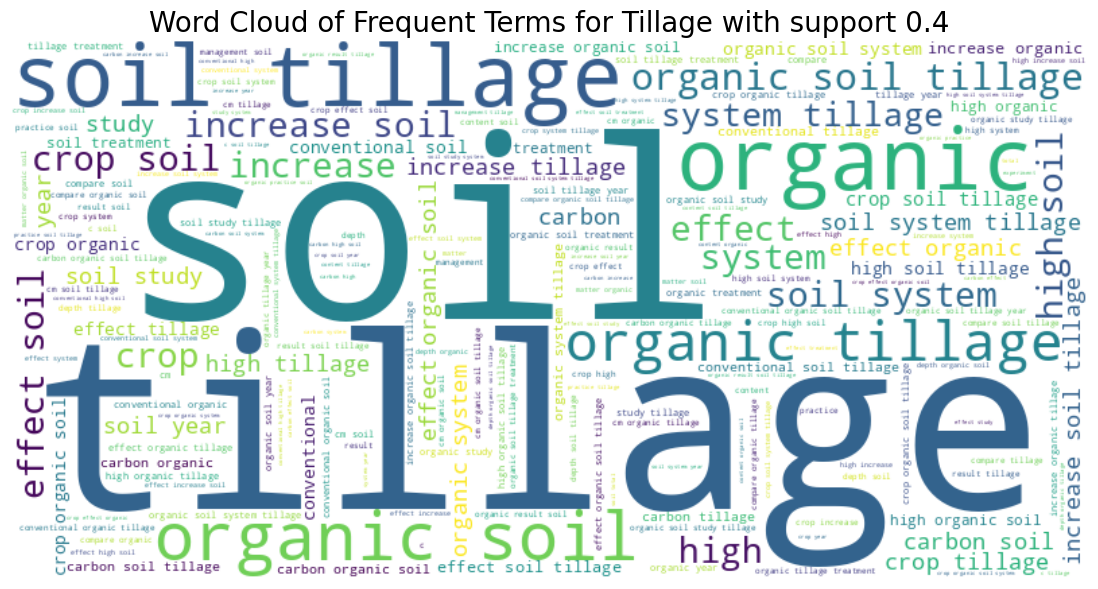

In [ ]:
frequency_dict = {}

for k, v in itemsets6.items():
    for items, frequency in v.items():
        # Join multi-word itemsets by a space or any other connector of your choice
        key = ' '.join(items)
        frequency_dict[key] = frequency

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Terms for Tillage with support 0.4', fontsize=20, color='black')
plt.show()